# Modelación de procesos estocásticos como generadores de observaciones científicas

## Tutorial práctico de estadística bayesiana en Python

####  3 de marzo, 2021
Juan Escamilla-Mólgora

# La ciencia, un sistema *constructivista y falsificable* para entender la realidad


*** Observaciones
*** Conjeturas
*** Hipótesis
*** Experimentos
*** Prueba de hipótesis
*** Construcción de teorías
*** principio de falsifabilidad


![a theory is nothing more than ](Notebooks/imgs/popper1.jpg "Popper-quote")

## Datos, Modelos y Probabilidad

Vamos a utilizar la métodología de MCMC (*Markov-Chain Monte Carlo*) (Variante hamiltoniana) para hacer un muestreo de la probabilidad posterior de los parámetros dadas las observaciones y los parámetros.

$$[\theta | data] = \frac{[data | \theta] [\theta]}{[data]} = \frac{\text{likelihood}~*~ \text{prior}}{\text{información de los datos}}$$

Nota: Maximum likelihood es un caso particular. 

Vamos a hacer una regresión lineal sencilla de la forma:
    
$$Y \sim N(\mu,\sigma^2) $$

$$\mu = \alpha + \beta_1 X_1 + \beta_2 X_2 $$

$$\alpha, \beta_i \sim N(0,10 000)$$

Donde $\alpha$ es el intercepto, $\beta_i$ son los coeficiente y $X_i$ son los covariables.


## Generar datos
Tomado de: https://docs.pymc.io/notebooks/getting_started.html

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np



In [208]:
# Initialize random number generator
SEMILLA = 1234
np.random.seed(SEMILLA)
az.style.use('arviz-darkgrid')


# Parametros
alpha = 10
betas = [20, 30]
sigma = 3.5

# Size of dataset
size = 100

# Predictor (covariables) variable
X1 = np.random.randn(size)
X2 = np.random.randn(size)



# Simulate outcome variable
Y = alpha + betas[0] * X1 + betas[1] * X2 + np.random.randn(size) * sigma




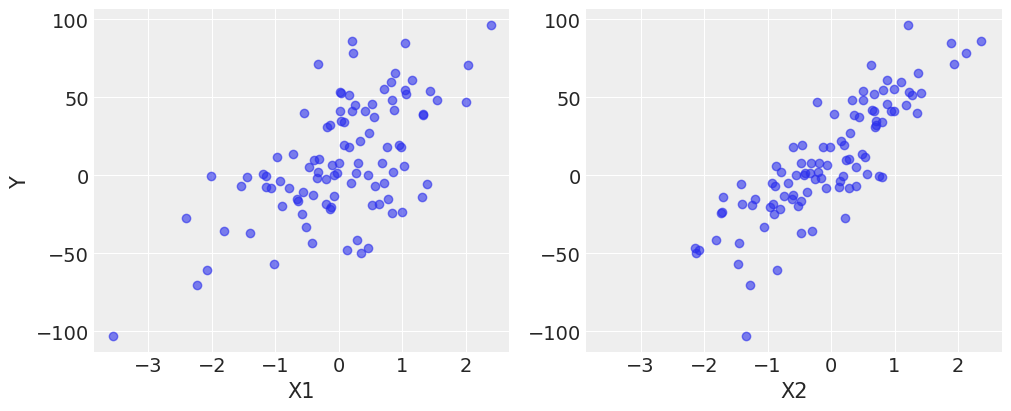

In [209]:

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");



In [ ]:
Probabilitic Programing languages 
 * STAN
 * PyMC3
 * TensorFlow probability
 * Edward
 * (Julia, Haskel)
Los más viejos
JaGS
BUGS

In [210]:
import pymc3 as pm

In [213]:
pm.StudentT()

In [214]:

basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.StudentT("alpha",30, mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)



In [ ]:
MCMC (Markov Chain Monte Carlo)
* Gibbs Sampling
* Metropolis-Hasting 
* Hamiltonian Monte Carlo (HMC)

In [215]:
with basic_model:
    # draw 500 aposterior samples
    trace = pm.sample(500, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 81 seconds.


/opt/conda/envs/biospytial3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


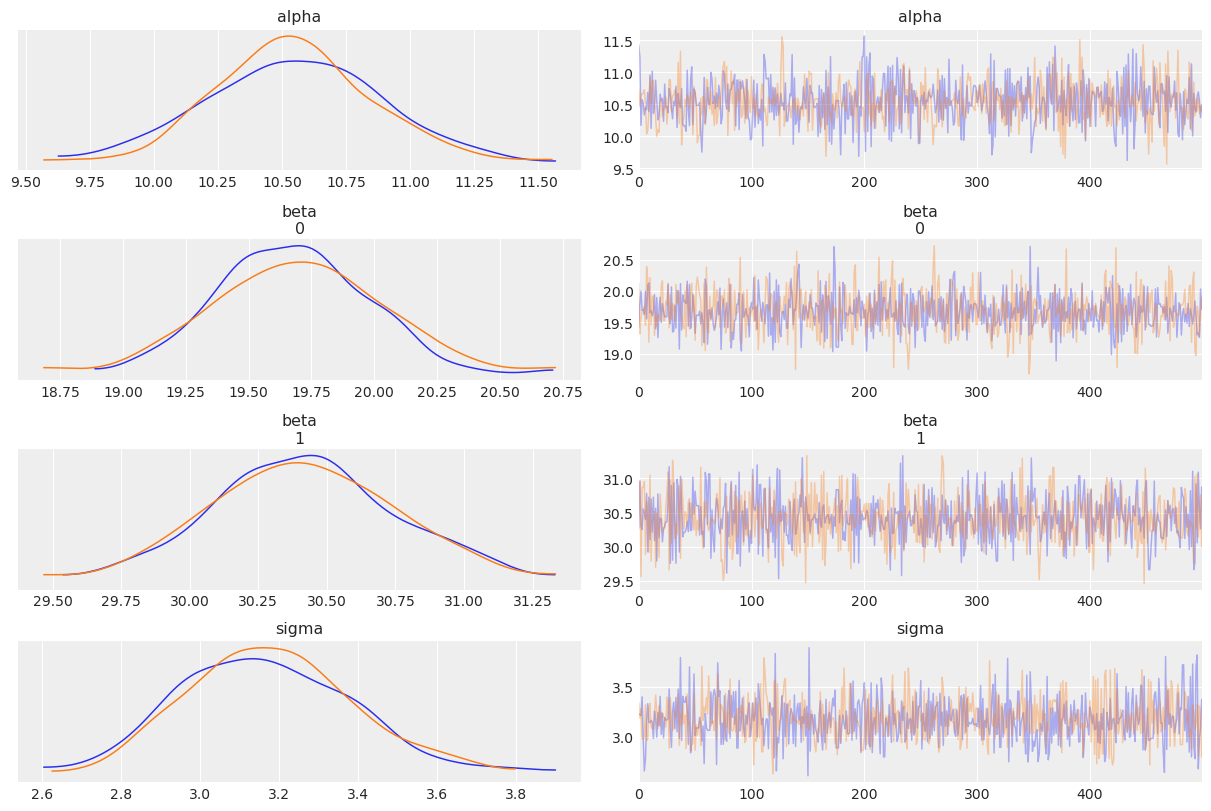

In [216]:
az.plot_trace(trace);


In [217]:
az.summary(trace, round_to=2)

/opt/conda/envs/biospytial3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,10.55,0.33,9.88,11.14,0.01,0.01,1311.97,1305.37,1330.89,544.52,1.01
beta[0],19.68,0.31,19.06,20.22,0.01,0.01,1553.49,1549.50,1539.52,623.94,1.01
beta[1],30.42,0.34,29.77,31.05,0.01,0.01,1583.60,1580.65,1578.93,731.76,1.00
sigma,3.18,0.22,2.77,3.59,0.01,0.00,1613.17,1601.56,1587.34,498.46,1.00


## BUSCAR las columnas 

## Regresión multiple


In [10]:
# Initialize random number generator
SEMILLA = 1234
np.random.seed(SEMILLA)
az.style.use('arviz-darkgrid')


# Parametros
alpha = 10
sigma = 0.1

intercept = 100
betas = np.array([intercept,20, 30, 40, 50, 60, 70])

k = 7
# Tamaño del dataset
n = 100

# Predictor variable

## Añadir la columna del intercepto
X = np.random.randn(n,k-1)
X = np.c_[np.ones(n),X]

epsilon = np.random.normal(loc=0,scale=sigma,size=n)
Y = np.dot(X,betas) + epsilon 



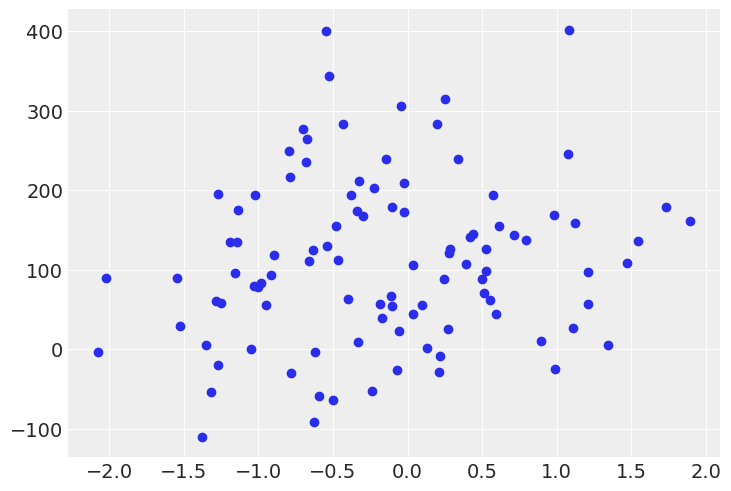

In [11]:
plt.scatter(X[:,2],Y)

In [12]:
basic_model = pm.Model()
import theano.tensor as tt
with basic_model:

    # Priors for unknown model parameters

    betas = pm.Normal("betas", mu=0, sigma=100, shape=k)
    sigma = pm.HalfNormal("sigma", sigma=100)
    epsilon = pm.Normal("epsilon", mu=0, sigma=sigma)

    # Expected value of outcome
    #mu = alpha + beta[0] * X1 + beta[1] * X2
    mu = tt.dot(X,betas) + epsilon
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sd=sigma, observed=Y)



In [13]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(2000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [epsilon, sigma, betas]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 268 seconds.
The acceptance probability does not match the target. It is 0.8823334401942393, but should be close to 0.8. Try to increase the number of tuning steps.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.


In [14]:
az.summary(trace, round_to=2)

/opt/conda/envs/biospytial3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
betas[0],100.01,0.11,99.80,100.20,0.0,0.0,1742.54,1742.20,1748.71,1687.61,1.0
betas[1],19.99,0.01,19.97,20.01,0.0,0.0,3518.05,3518.01,3511.32,2379.75,1.0
betas[2],30.01,0.01,29.99,30.04,0.0,0.0,4344.44,4344.42,4350.20,2884.61,1.0
betas[3],39.98,0.01,39.95,40.01,0.0,0.0,4578.98,4578.98,4620.19,2782.18,1.0
betas[4],50.00,0.01,49.98,50.02,0.0,0.0,5071.92,5071.74,5076.25,2494.43,1.0
betas[5],60.00,0.01,59.98,60.02,0.0,0.0,4260.95,4260.95,4257.28,2662.70,1.0
betas[6],70.00,0.01,69.97,70.02,0.0,0.0,4088.83,4088.78,4089.12,2587.24,1.0
epsilon,0.00,0.11,-0.22,0.19,0.0,0.0,1738.63,1738.63,1745.46,1680.45,1.0
sigma,0.11,0.01,0.09,0.12,0.0,0.0,2605.15,2605.15,2450.20,1552.28,1.0


## Effecto fijo no-lineal

In [218]:
# Initialize random number generator
SEMILLA = 1234
np.random.seed(SEMILLA)
az.style.use('arviz-darkgrid')


# Parametros
alpha = 10
sigma = 1

a = 0.0
c = 0.0

intercept = 100
betas = np.array([intercept,0,-2])

k = 3
# Tamaño del dataset
n = 100

# Predictor variable

## Añadir la columna del intercepto
X = np.random.randn(n)

## Añadimos un termino cuadrático
## Esta es una base
X = np.c_[np.ones(n),X,X*X]

epsilon = np.random.normal(loc=0,scale=sigma,size=n)
Y = np.dot(X,betas) + epsilon 



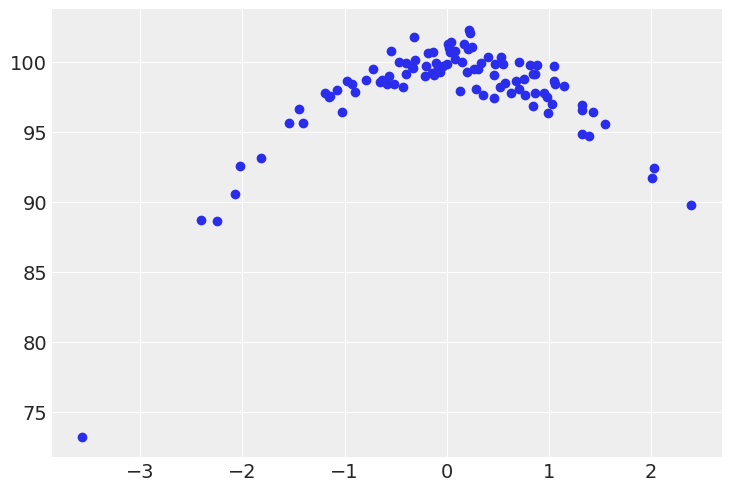

In [219]:
# Graficamos
plt.scatter(X[:,1],Y)

In [17]:
basic_model = pm.Model()
import theano.tensor as tt
with basic_model:

    # Priors for unknown model parameters

    betas = pm.Normal("betas", mu=0, sigma=100, shape=k)
    sigma = pm.HalfNormal("sigma", sigma=100)
    #sigma = pm.Exponential("sigma", 1.0)
    epsilon = pm.Normal("epsilon", mu=0, sigma=sigma)

    # Expected value of outcome
    #mu = alpha + beta[0] * X1 + beta[1] * X2
    mu = tt.dot(X,betas) + epsilon
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sd=sigma, observed=Y)


In [18]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(1000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [epsilon, sigma, betas]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 196 seconds.


In [19]:
az.summary(trace, round_to=2)

/opt/conda/envs/biospytial3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
betas[0],99.99,1.01,98.11,101.86,0.03,0.02,922.17,921.06,925.79,947.87,1.0
betas[1],0.06,0.11,-0.17,0.25,0.00,0.00,1462.42,1063.68,1461.59,1355.72,1.0
betas[2],-2.03,0.06,-2.15,-1.92,0.00,0.00,1538.08,1538.08,1551.40,1197.67,1.0
epsilon,-0.02,1.00,-1.90,1.83,0.03,0.03,915.58,785.33,917.89,852.68,1.0
sigma,1.00,0.08,0.87,1.15,0.00,0.00,1324.85,1324.85,1309.33,1031.17,1.0


## El traceplot nos ayuda a identificar si las cadenas alcanzaron estacionaridad.

/opt/conda/envs/biospytial3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'betas'}>,
        <AxesSubplot:title={'center':'betas'}>],
       [<AxesSubplot:title={'center':'epsilon'}>,
        <AxesSubplot:title={'center':'epsilon'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

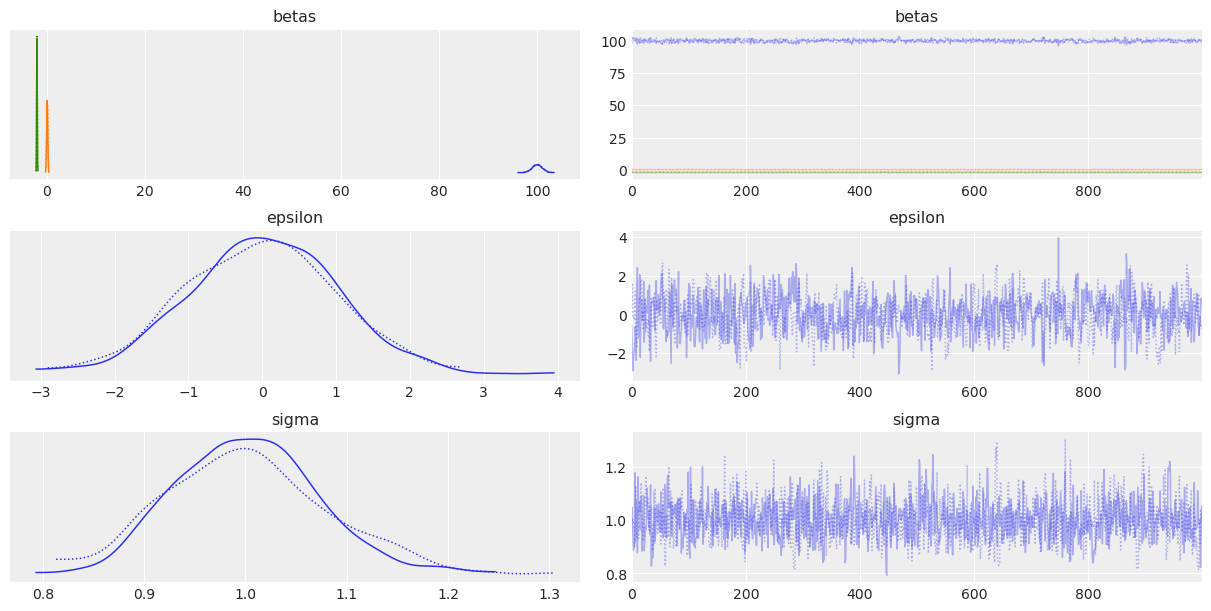

In [20]:
pm.traceplot(trace)

## Análisis de la posterior (Predicciones)

In [21]:
import sympy as smp
import pandas as pd
y,b2,b1,b0,x = smp.symbols('y,b2,b1,b0,x')
expr = b2*x**2 + b1*x + b0
parabola = smp.Eq(y,expr)
## Substituimos variables por parámetros
#par = parabola.subs(c,post_sum['c']).subs(a,2)

In [22]:
parabola

Eq(y, b0 + b1*x + b2*x**2)

In [23]:
f_x = smp.solve(parabola,y)[0]

### Construir las predicciones

In [24]:
#out_trace = list()
out_trace = pd.DataFrame()
for i,betas in enumerate(trace['betas'][:]):
    par = f_x.subs(b2,betas[2]).subs(b1,betas[1]).subs(b0,betas[0])
    xs = np.linspace(-10,10,20)
    out_trace['x'] = xs
    ys = list(map(smp.lambdify(x,par),xs))
    out_trace[i] = ys

In [25]:
out_trace.shape

(20, 2001)

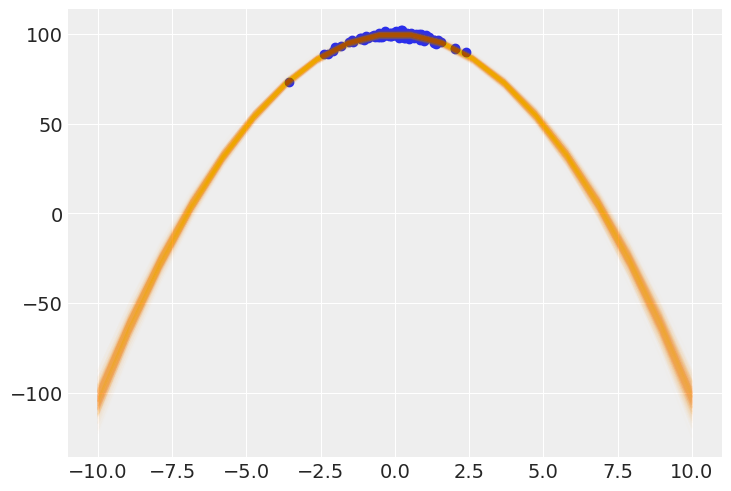

In [26]:
sample = out_trace.sample(n=400,axis=1)

plt.plot(out_trace['x'],sample,'r-',color='orange',alpha=0.01)
plt.scatter(X[:,1],Y)

## Modelos lineales generalisados
Regresemos al modelo con dos dimensiones en el espacio de covariables y definamos una variable de salida $Y$ distinta a la normal.

Por ejemplo: 

$$[Y | P] \sim Bernoulli(P) $$

$$ h(P) = \alpha + \beta_1 X_1 + \beta_2 X_2  + \epsilon $$

Donde: $h(p)$ es la función de enlace. En este caso 

$$ h(P) = logit(P) $$

Pero también podría ser:

$$ h(P) = ln(P)$$ 
* para un proceso Poisson (conteos).

$$ h(P) = logit(P) $$
 * Logit -> Binary, Binomial (categoricas)

Pongamos priors típicos:

$$\alpha, \beta_i \sim N(0,10 000)$$
$$ \epsilon \sim N(0,\sigma)$$
$$ \sigma \sim \text{Half Normal}(100)$$

Donde $\alpha$ es el intercepto, $\beta_i$ son los coeficiente y $X_i$ son los covariables.


## Simulación

In [70]:
from scipy.special import expit,logit
import scipy.stats as st
import seaborn as sb

In [203]:
# Initialize random number generator
SEMILLA = 1234
np.random.seed(SEMILLA)

# Parámetros
sigma = 0.1
sigma_y = 0.1
intercept = 10
#betas = np.array([intercept,20, 30])
betas = np.array([intercept,20])

k = betas.shape[0]
# Tamaño del dataset
n = 400

# Predictor variable

## Añadir la columna del intercepto
X = np.random.randn(n,k-1)
X = np.c_[np.ones(n),X]

epsilon = np.random.normal(loc=0,scale=sigma,size=n)
mu = np.dot(X,betas) + epsilon 


P = expit(mu)

Y = st.bernoulli.rvs(P)

#Y = st.norm(loc=mu,scale=sigma_y).rvs(n)


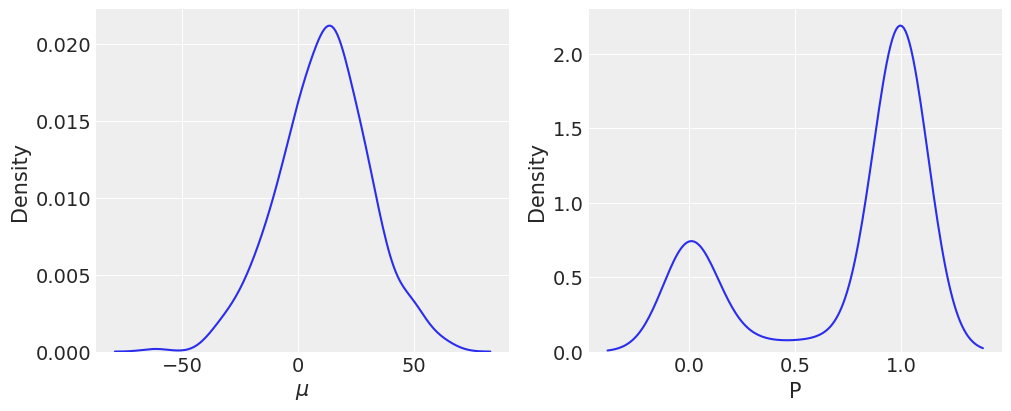

In [204]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sb.kdeplot(mu,ax=axes[0])
sb.kdeplot(P,ax=axes[1])
axes[0].set_xlabel('$\mu$')
axes[1].set_xlabel('P');

## El modelo en PyMC3 

In [205]:
glm_model = pm.Model()
import theano.tensor as tt
with glm_model:

    # Priors for unknown model parameters

    betas = pm.Normal("betas", mu=0, sigma=100, shape=k)
    sigma = pm.HalfNormal("sigma", sigma=1)
    #sigma_y = pm.HalfNormal("sigma_y",sigma=1)
    #sigma = pm.Exponential("sigma_y", 1.0)
    epsilon = pm.Normal("epsilon", mu=0, sigma=sigma)

    # Expected value of outcome
    #mu = alpha + beta[0] * X1 + beta[1] * X2
    mu = tt.dot(X,betas)  + epsilon
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Bernoulli("Y_obs",logit_p=mu,observed=Y)
    #Y_obs = pm.Normal("Y_obs", mu=mu, sd=sigma_y, observed=Y)

In [206]:
with glm_model:
    # draw 500 posterior samples
    trace = pm.sample(1000, return_inferencedata=False,tune=40000,chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [epsilon, sigma, betas]


Sampling 1 chain for 40_000 tune and 1_000 draw iterations (40_000 + 1_000 draws total) took 659 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.880781967752599, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


/opt/conda/envs/biospytial3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'betas\n0'}>,
        <AxesSubplot:title={'center':'betas\n0'}>],
       [<AxesSubplot:title={'center':'betas\n1'}>,
        <AxesSubplot:title={'center':'betas\n1'}>],
       [<AxesSubplot:title={'center':'epsilon'}>,
        <AxesSubplot:title={'center':'epsilon'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

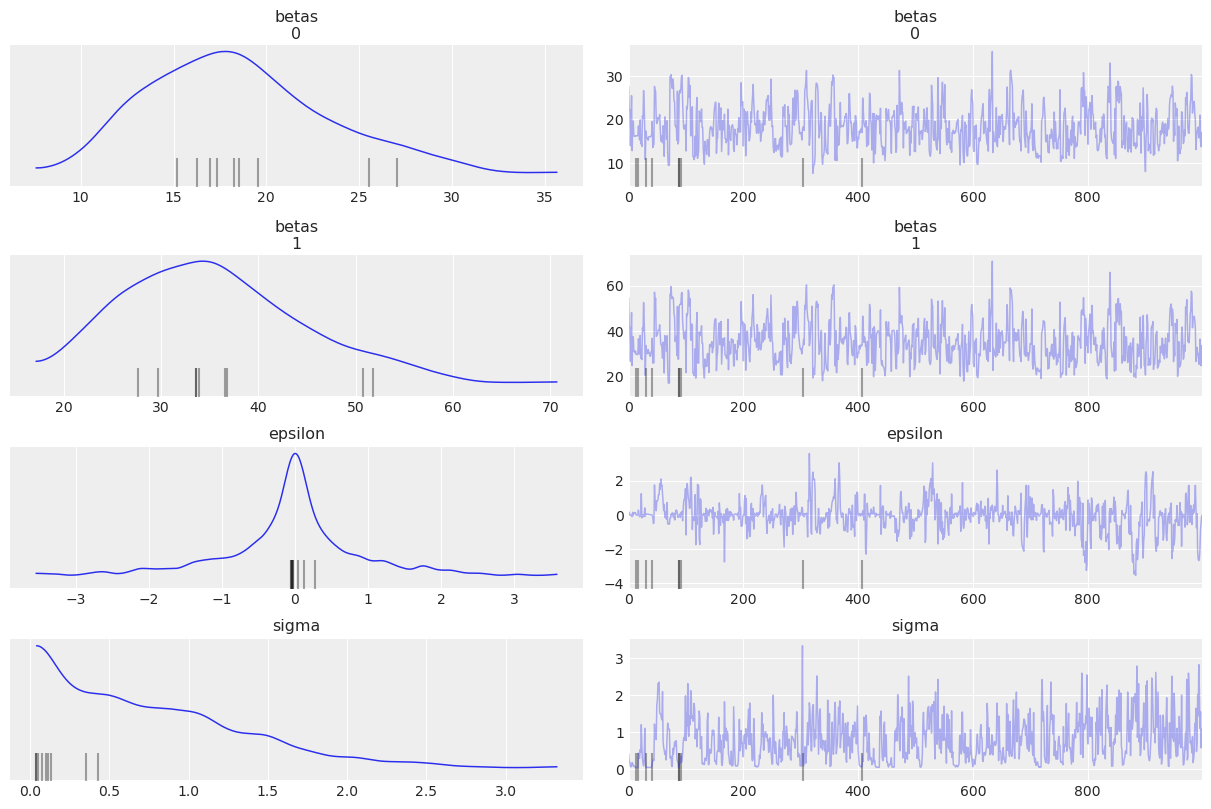

In [207]:
pm.plot_trace(trace)

In [198]:
az.summary(trace, round_to=2,)

/opt/conda/envs/biospytial3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
betas[0],8.42,2.06,5.12,12.58,0.15,0.11,179.10,179.01,181.78,271.04,NaN
betas[1],16.95,3.84,10.00,23.52,0.26,0.19,216.45,201.13,232.99,276.47,NaN
betas[2],25.55,5.72,16.22,36.72,0.38,0.28,223.00,207.19,240.08,285.43,NaN
epsilon,0.11,0.86,-1.40,1.90,0.07,0.05,156.62,156.62,197.13,215.67,NaN
sigma,0.78,0.56,0.04,1.81,0.04,0.03,195.10,195.10,103.79,30.05,NaN


## Modelos multinivel (tarea 1)
Implementar una simulación con variable continua (Gausiana) y 3 covariables que represente datos viniendo de dos poblaciones distintas.
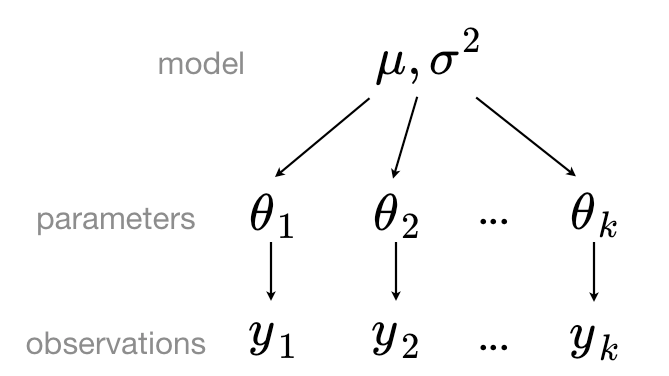

In [ ]:
8 school dataset


## Implementar el model en PyMC3

## Modelo de conteo
Implementar una simulación para variable de conteo (Proceso Poisson).
Esto es: 

$$[Y | \Lambda ] = Poisson(\Lambda )$$

$$ Ln(\Lambda) = \beta X + \epsilon $$

* ¿Cómo se podría generalizas ?
* Buscar una aplicación